In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
ocd_data = pd.read_csv('FD1.csv')
ocd_data.head()

,Washing,Checking,Counting,Arranging,Unwanted_Obsession,Repeating_Words,Avoiding_Places_Or_Situations,Hoarding,Thievery,Insistence,Class
0,0.6,0.2,0.5,0.2,0.0,0.3,0.3,0.0,0.0,0.0,Moderate
1,0.5,0.1,0.6,0.1,0.1,0.2,0.1,0.1,0.1,0.1,Moderate
2,0.7,0.5,0.7,0.4,0.5,0.4,0.5,0.6,0.2,0.3,Moderate
3,0.7,0.4,0.6,0.4,0.0,0.5,0.5,0.3,0.3,0.2,Moderate
4,0.6,0.4,0.7,0.2,0.1,0.4,0.5,0.3,0.2,0.2,Moderate


C:\Users\Jisan\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


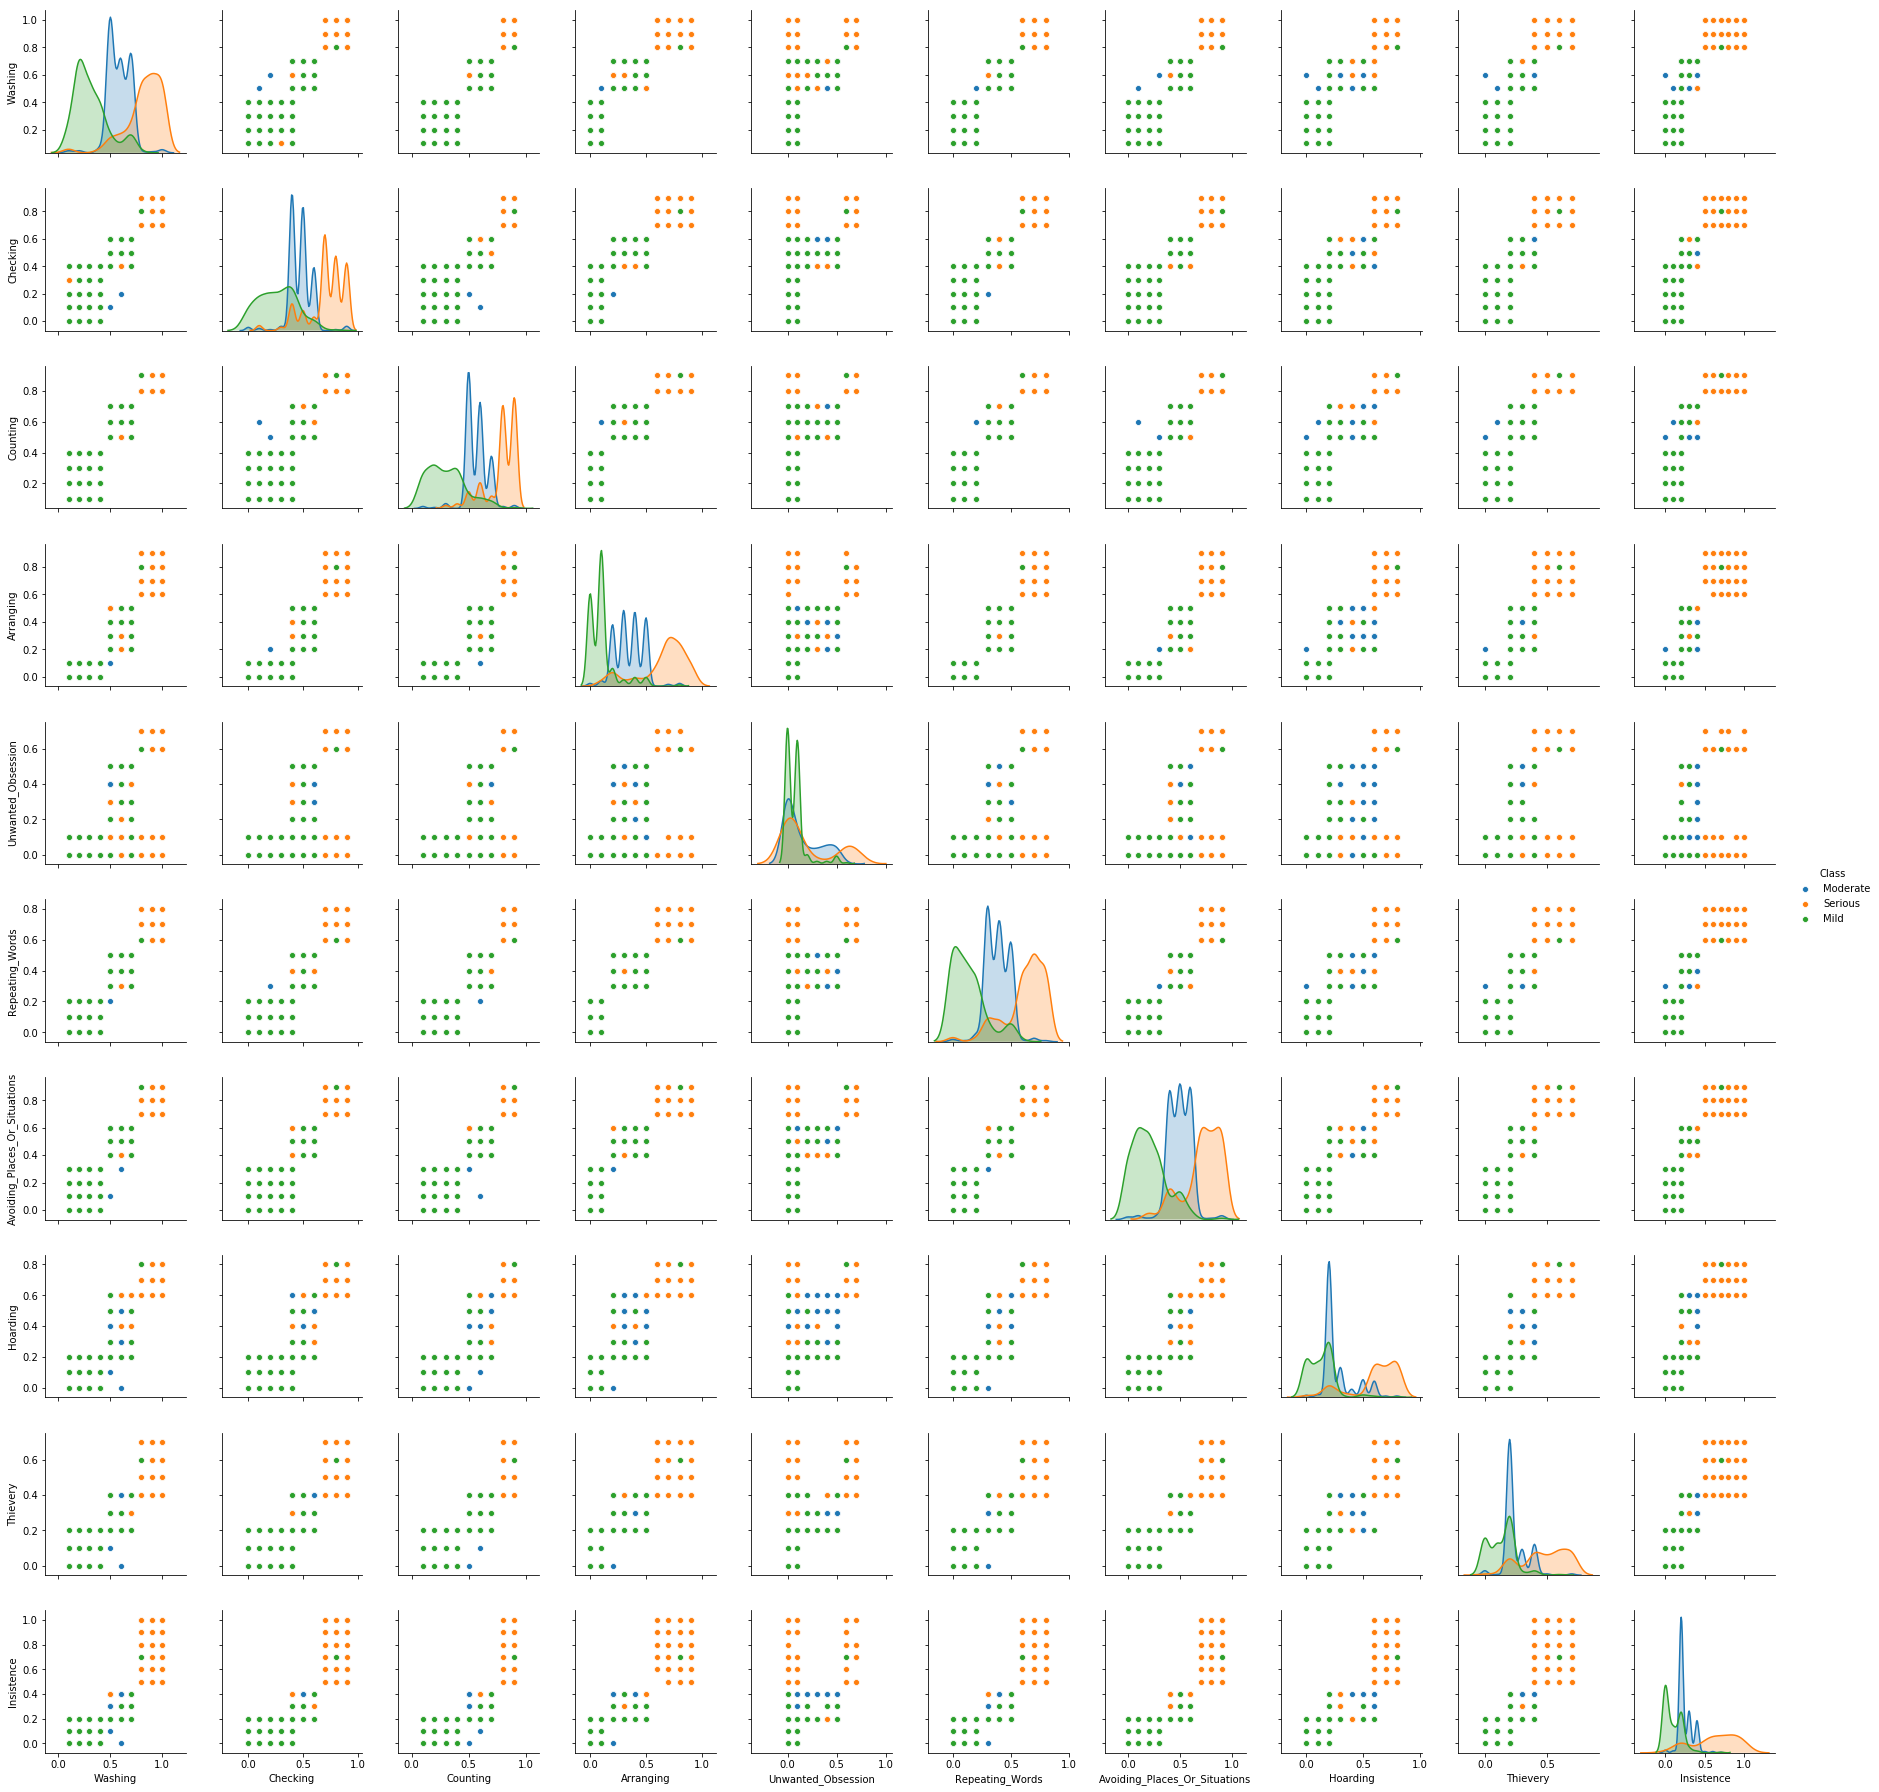

In [3]:
sns.pairplot(ocd_data, hue='Class')

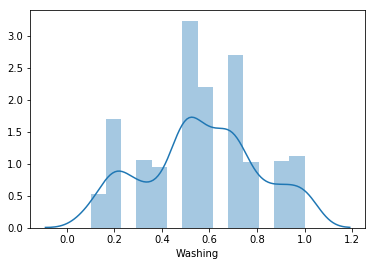

In [5]:
sns.distplot(ocd_data['Washing'])

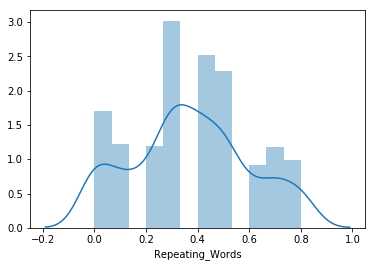

In [6]:
sns.distplot(ocd_data['Repeating_Words'])

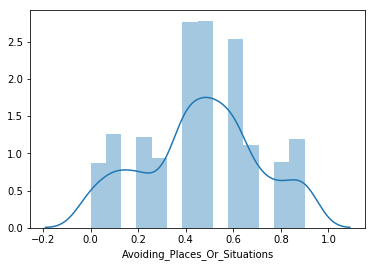

In [7]:
sns.distplot(ocd_data['Avoiding_Places_Or_Situations'])

In [5]:
ocd_data.corr()

,Washing,Checking,Counting,Arranging,Unwanted_Obsession,Repeating_Words,Avoiding_Places_Or_Situations,Hoarding,Thievery,Insistence
Washing,1.000000,0.815607,0.871105,0.869647,0.315825,0.869651,0.857863,0.792166,0.789529,0.798689
Checking,0.815607,1.000000,0.812157,0.838001,0.294615,0.828733,0.827487,0.777218,0.751598,0.778582
Counting,0.871105,0.812157,1.000000,0.859205,0.311039,0.871661,0.862815,0.776743,0.762376,0.795875
Arranging,0.869647,0.838001,0.859205,1.000000,0.325890,0.877227,0.856798,0.798629,0.811815,0.831391
Unwanted_Obsession,0.315825,0.294615,0.311039,0.325890,1.000000,0.295563,0.301914,0.294000,0.285886,0.290392
Repeating_Words,0.869651,0.828733,0.871661,0.877227,0.295563,1.000000,0.865492,0.778552,0.782687,0.823160
Avoiding_Places_Or_Situations,0.857863,0.827487,0.862815,0.856798,0.301914,0.865492,1.000000,0.785100,0.757207,0.802305
Hoarding,0.792166,0.777218,0.776743,0.798629,0.294000,0.778552,0.785100,1.000000,0.767870,0.828768
Thievery,0.789529,0.751598,0.762376,0.811815,0.285886,0.782687,0.757207,0.767870,1.000000,0.803023
Insistence,0.798689,0.778582,0.795875,0.831391,0.290392,0.823160,0.802305,0.828768,0.803023,1.000000


#### Here we can see correlation betweens 10 symptoms. From this values we can consider the strong relations leveled with 0.80 or above.

In [8]:
ocd_data['Class_num']=ocd_data.Class.map({'Mild':1, 'Moderate':2, 'Serious':3})

In [9]:
X = ocd_data[['Washing','Checking','Counting','Arranging','Unwanted_Obsession','Repeating_Words','Avoiding_Places_Or_Situations','Hoarding','Thievery','Insistence']]
Y = ocd_data.Class_num

In [10]:
print(X.shape)
print(Y.shape)

(716, 10)
(716,)


In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [12]:
from sklearn.svm import SVC
svm_model = SVC(C=1,gamma=10,kernel='rbf')


In [13]:
svm_model.fit(X_train, Y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=10, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

## SVM result

In [14]:
svm_model.score(X_test, Y_test)

0.8819444444444444

## evaluation

In [15]:
ocd_data.Class.value_counts()

Moderate    318
Mild        216
Serious     182
Name: Class, dtype: int64

In [16]:
pred_class=svm_model.predict(X_test)

## Confusion Matrix

In [17]:
from sklearn import metrics
print (metrics.confusion_matrix(Y_test,pred_class))

[[39  8  0]
 [ 0 58  1]
 [ 1  7 30]]


## Classification Report

In [18]:
from sklearn.metrics import classification_report
print (classification_report(Y_test,pred_class))

              precision    recall  f1-score   support

           1       0.97      0.83      0.90        47
           2       0.79      0.98      0.88        59
           3       0.97      0.79      0.87        38

   micro avg       0.88      0.88      0.88       144
   macro avg       0.91      0.87      0.88       144
weighted avg       0.90      0.88      0.88       144



## KNN

Text(0, 0.5, 'Testing Accuracy')

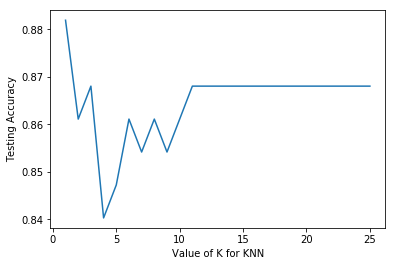

In [19]:
from sklearn.neighbors import KNeighborsClassifier
k_range = list(range(1, 26))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, Y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(Y_test, y_pred))

import matplotlib.pyplot as plt

# allow plots to appear within the notebook
%matplotlib inline

# plot the relationship between K and testing accuracy
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')
    
    


### This will be wise to use K= (value) between 9 to 25. we can get more accuracy between 1 to 3 . but there will be outer layer and noise values.

In [20]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, Y_train)
knn.score(X_test, Y_test)

0.8472222222222222

In [21]:
y_pred = knn.predict(X_test)
print (metrics.confusion_matrix(Y_test,y_pred))

[[38  9  0]
 [ 3 54  2]
 [ 2  6 30]]


In [22]:
print (classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           1       0.88      0.81      0.84        47
           2       0.78      0.92      0.84        59
           3       0.94      0.79      0.86        38

   micro avg       0.85      0.85      0.85       144
   macro avg       0.87      0.84      0.85       144
weighted avg       0.86      0.85      0.85       144



#### ---End Of KNN---

# -----------------------------USER INPUT TEST--------------------------------

In [1]:
import time
symptom_list=['Washing','Checking','Counting','Arranging','Unwanted_Obsession','Repeating_Words','Avoiding_Places_Or_Situations','Hoarding','Thievery','Insistence']
from array import *
scaned_data = array('d', [])
for x in range(10):
    print("intensity of "+symptom_list[x]+" (The range should be 0 to 10). ")
    y=float(input())/10
    scaned_data.append(y)

r=svm_model.predict([scaned_data])
import time
print("\n\n\n\n Analysing", end="")
for p in range(20):
    print("-", end="")
    time.sleep(.5)
print(" \n\n\n")

if r==1:
    print("The level of OCD is MILD")
elif r==2:
    print("The level of OCD is MODERATE")
elif r==3:
    print("The level of OCD is SERIOUS")


intensity of Washing (The range should be 0 to 10). 
2
intensity of Checking (The range should be 0 to 10). 
4
intensity of Counting (The range should be 0 to 10). 
6
intensity of Arranging (The range should be 0 to 10). 
3
intensity of Unwanted_Obsession (The range should be 0 to 10). 
4
intensity of Repeating_Words (The range should be 0 to 10). 
2
intensity of Avoiding_Places_Or_Situations (The range should be 0 to 10). 
5
intensity of Hoarding (The range should be 0 to 10). 
3
intensity of Thievery (The range should be 0 to 10). 
8
intensity of Insistence (The range should be 0 to 10). 
9


NameError: name 'svm_model' is not defined


# End